In [30]:
#import model building libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

# Image Preprocessing

In [31]:
from keras.preprocessing.image import ImageDataGenerator

In [32]:
#configure image data generator
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


In [33]:
#Apply image datat genrator funtionality to train and test images
x_train = train_datagen.flow_from_directory(r"C:\Hackdata\Train_Alphabet",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 2700 images belonging to 3 classes.


In [34]:
x_test = train_datagen.flow_from_directory(r"C:\Hackdata\Test_Alphabet",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 300 images belonging to 3 classes.


In [35]:
print(x_train.class_indices)

{'A': 0, 'B': 1, 'C': 2}


# Model Building

In [36]:
#initializing the model
model = Sequential()

In [37]:
#3.add convolution layer(no.of filters,size of filter,input shape)
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

In [38]:
#add max pool layer(pool_size)
model.add(MaxPooling2D(pool_size=(2,2)))

In [39]:
#add flatten layer --> input of ANN
model.add(Flatten())

In [40]:
#ANN hidden layer
model.add(Dense(units=64 , activation = "relu"))

In [41]:

#Add output layer
model.add(Dense(units=3 , activation = "softmax"))

In [42]:
#compile the model (loss function , accuracy , optimizer)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = "accuracy")

In [43]:
#model.fit(x_train,steps_per_epoch = 39 ,epochs = 10, validation_data = x_test, validation_steps=10)

model.fit(x_train, steps_per_epoch=len(x_train), epochs=10, validation_data=x_test, validation_steps=len(x_test))

Epoch 1/10
85/85 [==============================] - 65s 748ms/step - loss: 0.8018 - accuracy: 0.7204 - val_loss: 0.3009 - val_accuracy: 0.9700
Epoch 2/10
85/85 [==============================] - 29s 343ms/step - loss: 0.2117 - accuracy: 0.9593 - val_loss: 0.1119 - val_accuracy: 0.9833
Epoch 3/10
85/85 [==============================] - 29s 340ms/step - loss: 0.1074 - accuracy: 0.9733 - val_loss: 0.0757 - val_accuracy: 0.9867
Epoch 4/10
85/85 [==============================] - 30s 355ms/step - loss: 0.0767 - accuracy: 0.9830 - val_loss: 0.0817 - val_accuracy: 0.9733
Epoch 5/10
85/85 [==============================] - 29s 336ms/step - loss: 0.0526 - accuracy: 0.9874 - val_loss: 0.0483 - val_accuracy: 0.9933
Epoch 6/10
85/85 [==============================] - 28s 326ms/step - loss: 0.0415 - accuracy: 0.9885 - val_loss: 0.0527 - val_accuracy: 0.9800
Epoch 7/10
85/85 [==============================] - 27s 319ms/step - loss: 0.0410 - accuracy: 0.9885 - val_loss: 0.0634 - val_accuracy: 0.9800

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                1968192   
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1969283 (7.51 MB)
Trainable params: 1969283 (7.51 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [45]:
#save model
model.save("slientspeaklast.h5")

# Test the model

In [46]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [47]:
model = tf.keras.models.load_model(r"slientspeak.h5",compile=False)

In [48]:
img=image.load_img(r"C:\Users\shrey\Downloads\archive\sign_language\yes\WIN_20240125_23_28_47_Pro.jpg",target_size=(64,64))

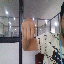

In [20]:
img

In [21]:
x=image.img_to_array(img)

In [22]:
x

array([[[126., 125., 121.],
        [123., 122., 118.],
        [127., 121., 107.],
        ...,
        [139., 149., 140.],
        [159., 150., 151.],
        [151., 151., 149.]],

       [[113., 123., 112.],
        [131., 122., 127.],
        [121., 119., 120.],
        ...,
        [159., 150., 151.],
        [157., 149., 146.],
        [134., 128., 114.]],

       [[122., 126., 129.],
        [133., 121., 131.],
        [114., 124., 123.],
        ...,
        [156., 152., 153.],
        [144., 149., 142.],
        [ 22.,  37.,  34.]],

       ...,

       [[184., 185., 187.],
        [177., 183., 183.],
        [181., 185., 186.],
        ...,
        [127., 152., 172.],
        [ 22.,  39.,  65.],
        [ 16.,  25.,  24.]],

       [[193., 186., 193.],
        [188., 183., 187.],
        [179., 183., 192.],
        ...,
        [ 88., 136., 156.],
        [120., 137., 145.],
        [ 38.,  28.,  29.]],

       [[182., 183., 188.],
        [183., 179., 180.],
        [178., 1

In [23]:
x=np.expand_dims(x,axis=0)

In [24]:
x.ndim

4

In [25]:
x.shape

(1, 64, 64, 3)

In [26]:
pred=model.predict(x)

1/1 [==============================] - 0s 61ms/step


In [27]:
pred

array([[0.0000000e+00, 1.9862367e-21, 9.9999988e-01, 1.4514076e-11,
        3.9171697e-27, 0.0000000e+00, 6.1790395e-08, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [28]:
pred_class=np.argmax(pred,axis=1)

In [29]:
pred_class[0]

2

In [ ]:
index=["bears","crows","elephants","rats"]

result = str(index[pred_class[0]])

In [ ]:
result